In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

In [3]:
from scipy.stats import multivariate_normal

In [4]:
# параметры распределений
mu0, sigma0 = -2., 1.
mu1, sigma1 = 3., 2.

In [5]:
def sample(d0, d1, n=32):
    x0 = d0.sample((n,))#.reshape((n,2)) + torch.tensor([muX, muY])
    x1 = d1.sample((n,))#.reshape((n,2)) + torch.tensor([muX, muY])
    #print("x0 mean: ", x0[:,0].mean(), x0[:,1].mean(), "\nx0 std:  ", x0.std())
    #print("x1 mean: ", x1[:,0].mean(), x1[:,1].mean(), "\nx1 std:  ", x1.std())
    y0 = torch.zeros((n, 1))
    y1 = torch.ones((n, 1))
    return torch.cat([x0, x1], 0), torch.cat([y0, y1], 0)

In [25]:
mu0X = -2.
mu0Y = -2.
mu1X = 2.
mu1Y = 2.

d0 = torch.distributions.Normal(torch.tensor([mu0X, mu0Y]), torch.tensor([sigma0]))
d1 = torch.distributions.Normal(torch.tensor([mu1X, mu1Y]), torch.tensor([sigma1]))

In [26]:
x, y = sample(d0, d1, n = 5000)
x.size()
#x=x+torch.tensor([muX, muY])
#x[0,:]

torch.Size([10000, 2])

In [27]:
layer = nn.Linear(2, 1)
print([p.data[0] for p in layer.parameters()])
layer_opt = optim.SGD(lr=1e-3, params=list(layer.parameters()))

[tensor([ 0.6447, -0.4867]), tensor(-0.3573)]


In [35]:
log_freq = 500
for i in range(50000):
    if i%log_freq == 0:
        with torch.no_grad():
            x, y = sample(d0, d1, 100000)
            out = F.sigmoid(layer(x))
            loss = F.binary_cross_entropy(out, y)
        print('Ошибка после %d итераций: %f' %(i/log_freq, loss))
    layer_opt.zero_grad()
    x, y = sample(d0, d1, 1024)
    out = F.sigmoid(layer(x))
    loss = F.binary_cross_entropy(out, y)
    loss.backward()
    layer_opt.step()

C:\Users\11007098\Documents\py\WinPython\python-3.6.5.amd64\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Ошибка после 0 итераций: 0.114885
Ошибка после 1 итераций: 0.114370
Ошибка после 2 итераций: 0.112934
Ошибка после 3 итераций: 0.111863
Ошибка после 4 итераций: 0.111489
Ошибка после 5 итераций: 0.110878
Ошибка после 6 итераций: 0.110832
Ошибка после 7 итераций: 0.107906
Ошибка после 8 итераций: 0.108997
Ошибка после 9 итераций: 0.106621
Ошибка после 10 итераций: 0.106363
Ошибка после 11 итераций: 0.105700
Ошибка после 12 итераций: 0.104788
Ошибка после 13 итераций: 0.105719
Ошибка после 14 итераций: 0.105408
Ошибка после 15 итераций: 0.103422
Ошибка после 16 итераций: 0.103430
Ошибка после 17 итераций: 0.102680
Ошибка после 18 итераций: 0.103131
Ошибка после 19 итераций: 0.103013
Ошибка после 20 итераций: 0.100798
Ошибка после 21 итераций: 0.102184
Ошибка после 22 итераций: 0.100819
Ошибка после 23 итераций: 0.101660
Ошибка после 24 итераций: 0.100426
Ошибка после 25 итераций: 0.099550
Ошибка после 26 итераций: 0.099680
Ошибка после 27 итераций: 0.098229
Ошибка после 28 итераций: 0.09

In [29]:
# x_scale = np.linspace(-10, 10, 5000)
# d0_pdf = stats.norm.pdf(x_scale, mu0, sigma0) 
# d1_pdf = stats.norm.pdf(x_scale, mu1, sigma1)
# x_tensor = torch.tensor(x_scale.reshape(-1, 1), dtype=torch.float)
# with torch.no_grad():
#     dist = F.sigmoid(layer(x_tensor)).numpy()
# ratio = d1_pdf / (d1_pdf + d0_pdf)

C:\Users\11007098\Documents\py\WinPython\python-3.6.5.amd64\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


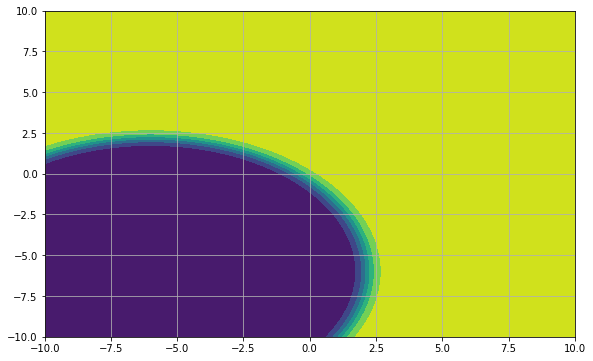

In [36]:
nx, ny = (300, 300)
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
xv, yv = np.meshgrid(x, y)
F0 = multivariate_normal([mu0X, mu0Y], sigma0)
F1 = multivariate_normal([mu1X, mu1Y], sigma1)
F0.pdf([2,-2])

a = list(zip(xv.reshape(1,-1).tolist()[0], yv.reshape(1,-1).tolist()[0]))
b = np.reshape(a, (nx,ny,2))
f0 = F0.pdf(b)
f1 = F1.pdf(b)
ratio = f1 / (f1 + f0)
ratio
plt.contourf(x,y,ratio)

plt.grid(True)
c = torch.tensor(b, dtype=torch.float)
with torch.no_grad():
    dist = F.sigmoid(layer(c)).numpy()

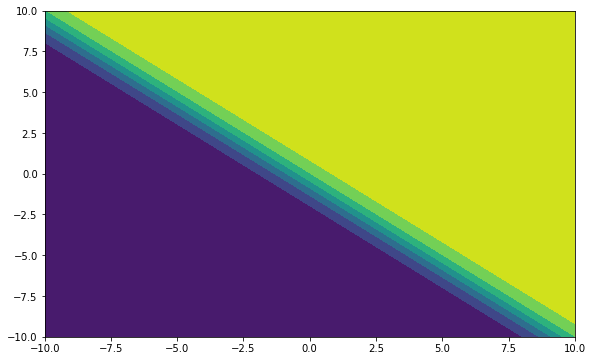

In [37]:
dist = dist.reshape((nx,ny))
h = plt.contourf(x,y,dist)

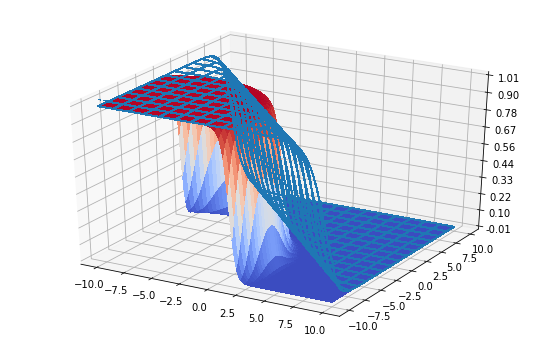

In [38]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xv, yv, 1-ratio, cmap=cm.coolwarm, rstride=5, cstride=5,
                       linewidth=0, antialiased=False)
surf2 = ax.plot_wireframe(xv, yv, 1-dist, cmap=cm.coolwarm, rstride=20, cstride=20,
                       linewidth=1, antialiased=False)

ax.set_zlim(-0.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

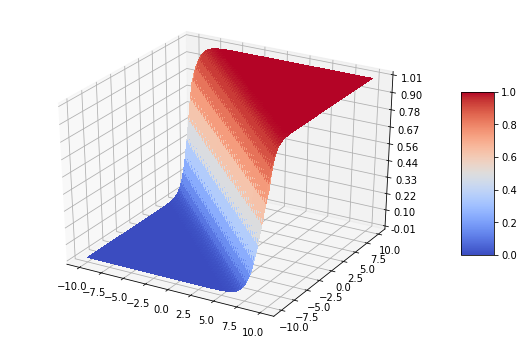

In [39]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xv, yv, dist, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-0.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

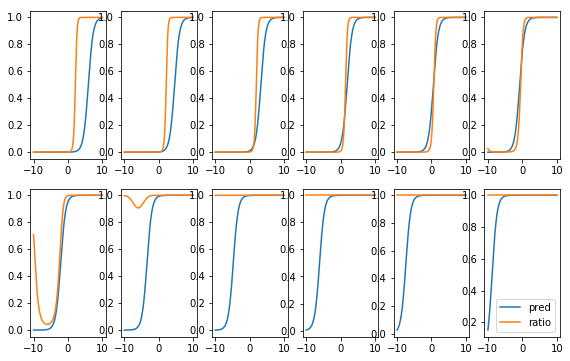

In [40]:
# plt.plot(x_scale, d0_pdf*2, label='d0') # умножение на 2 для красоты графиков, на распределения не влияет
# plt.plot(x_scale, d1_pdf*2, label='d1')
plt.rcParams['figure.figsize'] = [9.5, 6]
yy = 50
for i in range(12):
    plt.subplot(2, 6, i+1)
    plt.plot(x, dist[yy+20*i,:], label='pred')
    plt.plot(x, ratio[yy+20*i,:], label='ratio')
plt.legend();

In [16]:
ratio.shape

(300, 300)

In [9]:
print([p.data[0] for p in layer.parameters()])

[tensor([1.4862]), tensor(-0.4003)]


In [10]:
torch.log(F.sigmoid(torch.tensor(-100.)))

C:\Users\11007098\Documents\py\WinPython\python-3.6.5.amd64\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor(-inf)

In [11]:
F.logsigmoid(torch.tensor(-100.))

tensor(-100.)